In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install the Kaggle library
!pip install kaggle

In [ ]:
# Upload your Kaggle API key file (kaggle.json) to Colab
from google.colab import files
files.upload()

# Make a directory named kaggle and copy the kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set permissions for the file
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset using the Kaggle API
!kaggle datasets download -d ninadaithal/imagesoasis

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/ninadaithal/imagesoasis
License(s): Apache 2.0
100% 1.23G/1.23G [00:58<00:00, 21.1MB/s]
100% 1.23G/1.23G [00:58<00:00, 22.7MB/s]


In [ ]:
# Unzip the dataset
!unzip imagesoasis.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_102.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_103.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_104.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_105.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_106.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_107.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_108.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_109.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_110.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_111.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_112.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_113.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_114.jpg  
  inflating: Data/Very mild Dementia/OAS1_0247_MR1_mpr-4_115.jpg  
  inflating

In [ ]:
!pip install transformers
!pip install datasets
!pip install torch
!pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 42.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py

**Data Loading**

In [ ]:
import os
import numpy as np

main_dir = "/content/Data"
class_mapping = {"Mild Dementia": 0, "Moderate Dementia": 1, "Non Demented": 2, "Very mild Dementia": 3}

# Collect paths and labels
paths = []
labels = []

for class_name in os.listdir(main_dir):
    class_dir = os.path.join(main_dir, class_name)
    if os.path.isdir(class_dir):
        label = class_mapping.get(class_name)
        for img_name in os.listdir(class_dir):
            paths.append(os.path.join(class_dir, img_name))
            labels.append(label)

# Convert labels to a numpy array
labels = np.array(labels)

In [ ]:
# Calculate the length of each class
class_lengths = [len(labels[labels == i]) for i in range(len(class_mapping))]

# Print the length of each class
for class_name, length in zip(class_mapping.keys(), class_lengths):
    print(f"Class '{class_name}': {length} samples")

Class 'Mild Dementia': 5002 samples
Class 'Moderate Dementia': 488 samples
Class 'Non Demented': 67222 samples
Class 'Very mild Dementia': 13725 samples


**Class Balancing**

In [ ]:
from sklearn.utils import resample

# Desired number of samples per class
target_samples = 13725  # As given, the count of class 3

# Empty lists for balanced dataset
balanced_paths = []
balanced_labels = []

for class_index in np.unique(labels):
    # Extract indices of each class
    class_indices = np.where(labels == class_index)[0]
    # Resample indices
    resampled_indices = resample(class_indices, replace=len(class_indices) < target_samples, n_samples=target_samples)
    # Append to lists
    balanced_paths.extend(paths[i] for i in resampled_indices)
    balanced_labels.extend(labels[i] for i in resampled_indices)


**Balanced Classes Lenght**

In [ ]:
# Print class lengths
print("Balanced class sizes:")
for class_index in np.unique(balanced_labels):
    print(f"Class {class_index} ({list(class_mapping.keys())[list(class_mapping.values()).index(class_index)]}): {np.sum(np.array(balanced_labels) == class_index)}")

Balanced class sizes:
Class 0 (Mild Dementia): 13725
Class 1 (Moderate Dementia): 13725
Class 2 (Non Demented): 13725
Class 3 (Very mild Dementia): 13725


**Pre-Processing**

In [ ]:
import os
import numpy as np
from sklearn.utils import resample
from PIL import Image
import matplotlib.pyplot as plt

# Image loading and preprocessing generator
def image_loader(image_paths, labels, batch_size):
    while True:
        for start in range(0, len(image_paths), batch_size):
            end = min(start + batch_size, len(image_paths))
            batch_images = []
            batch_labels = []

            for i in range(start, end):
                img = Image.open(image_paths[i])
                img = img.resize((128, 128))
                img = np.array(img) / 255.0
                batch_images.append(img)
                batch_labels.append(labels[i])

            yield np.array(batch_images), np.array(batch_labels)

**Shape of each class**

Shape of images in class 0 (Mild Dementia): (128, 128, 3)
Shape of images in class 1 (Moderate Dementia): (128, 128, 3)
Shape of images in class 2 (Non Demented): (128, 128, 3)
Shape of images in class 3 (Very mild Dementia): (128, 128, 3)


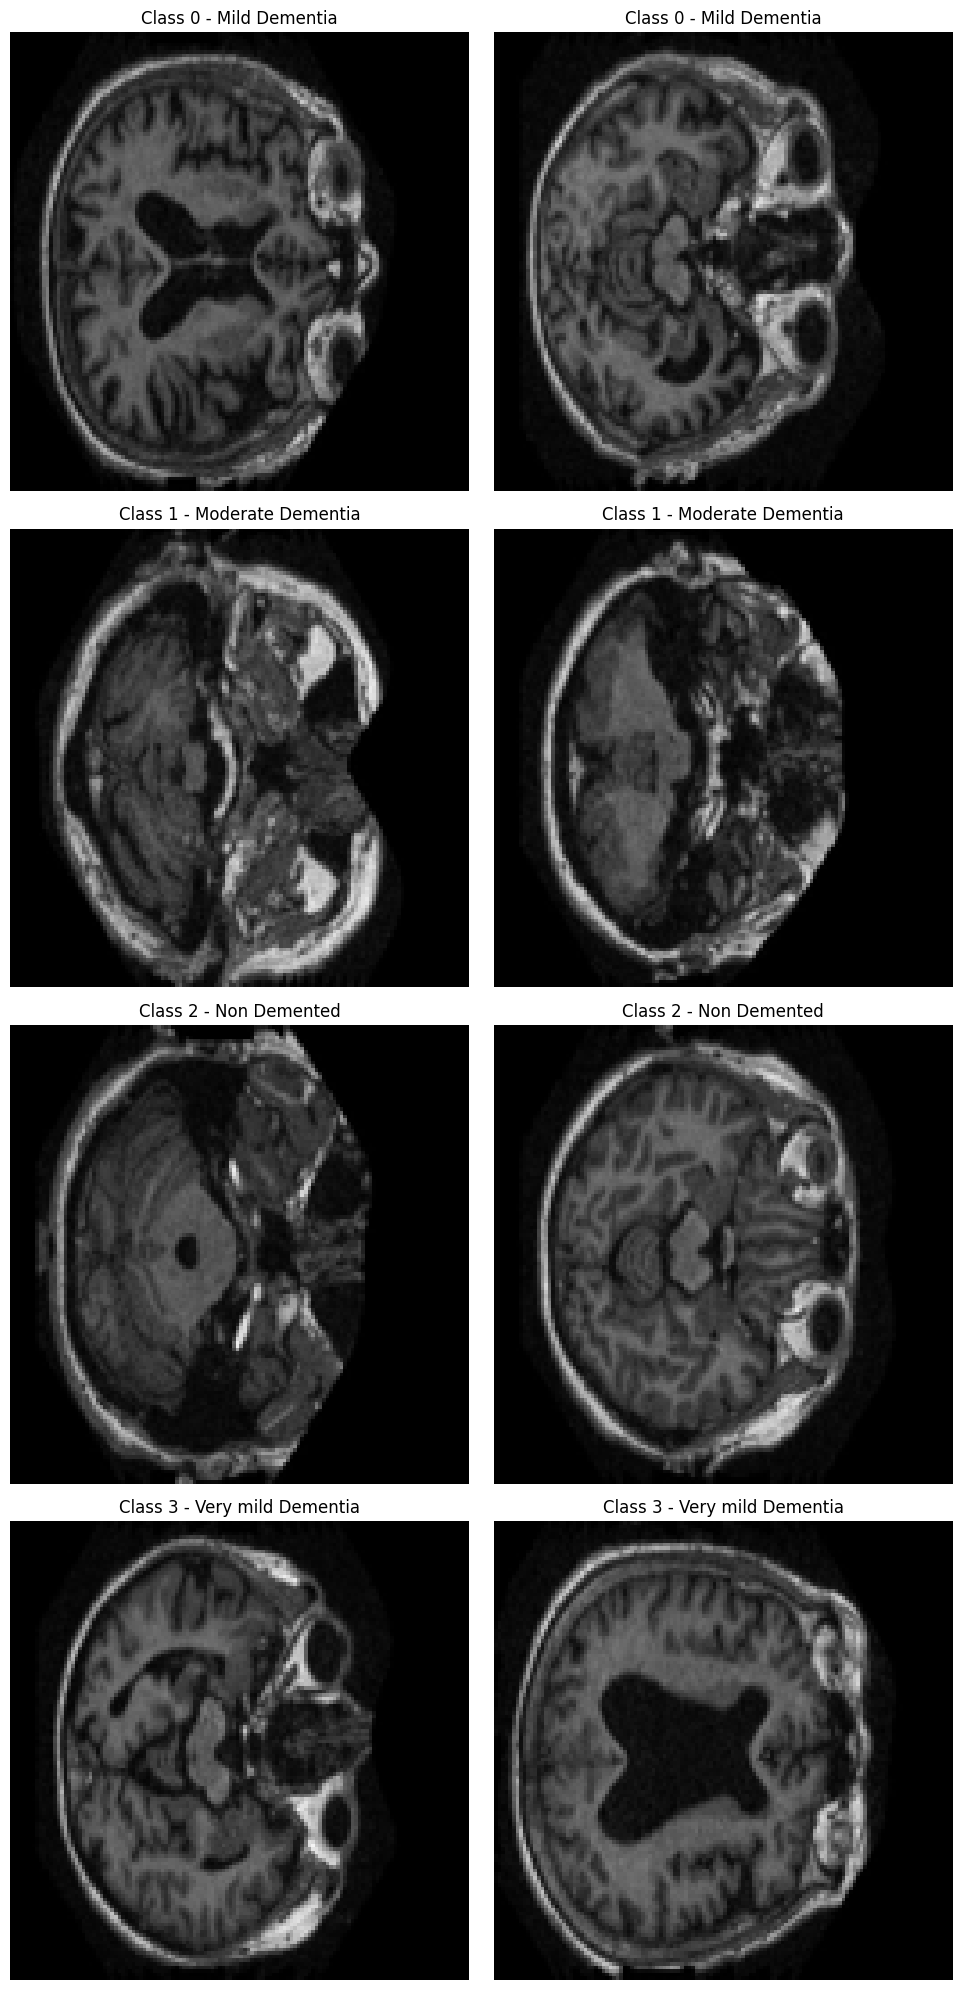

In [ ]:
# Plot images and print shape of each class
def plot_and_print_shapes(image_paths, labels):
    unique_labels = np.unique(labels)
    fig, axes = plt.subplots(len(unique_labels), 2, figsize=(10, 5 * len(unique_labels)))

    for i, label in enumerate(unique_labels):
        indices = [idx for idx, l in enumerate(labels) if l == label][:2]
        for j, idx in enumerate(indices):
            img = Image.open(image_paths[idx])
            img = img.resize((128, 128))
            img = np.array(img) / 255.0
            if len(unique_labels) > 1:
                ax = axes[i, j]
            else:
                ax = axes[j]
            ax.imshow(img)
            ax.set_title(f"Class {label} - {list(class_mapping.keys())[list(class_mapping.values()).index(label)]}")
            ax.axis('off')

            # Print image shape
            if j == 0:  # Print once per class
                print(f"Shape of images in class {label} ({list(class_mapping.keys())[list(class_mapping.values()).index(label)]}): {img.shape}")

    plt.tight_layout()
    plt.show()

plot_and_print_shapes(balanced_paths, balanced_labels)

**Model Fine Tuning**

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import ViTFeatureExtractor, ViTForImageClassification, AdamW
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import os

# Check if CUDA is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

# Custom Dataset class to handle image loading and preprocessing
class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, feature_extractor):
        self.image_paths = image_paths
        self.labels = labels
        self.feature_extractor = feature_extractor

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        image = self.feature_extractor(images=image, return_tensors="pt")['pixel_values'].squeeze(0)
        label = torch.tensor(self.labels[idx])
        return image, label

# Splitting the dataset into training and validation sets
train_paths, temp_paths, train_labels, temp_labels = train_test_split(
    balanced_paths, balanced_labels,
    test_size=0.2,  # 20% for the combined validation and test sets
    random_state=42
)

# Second split: Split the remaining 20% into 10% validation and 10% test
val_paths, test_paths, val_labels, test_labels = train_test_split(
    temp_paths, temp_labels,
    test_size=0.5,  # Split the temporary set equally into validation and test
    random_state=42
)
# Creating DataLoader for both training and validation datasets
train_dataset = CustomDataset(train_paths, np.array(train_labels), feature_extractor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = CustomDataset(val_paths, np.array(val_labels), feature_extractor)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

test_dataset = CustomDataset(test_paths, np.array(test_labels), feature_extractor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load the model
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224-in21k',
    num_labels=len(np.unique(balanced_labels))  # Adapt this as per the number of unique labels in your dataset
)
model.to(device)

# Define the optimizer and loss function
optimizer = AdamW(model.parameters(), lr=5e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Function to perform training on one epoch and calculate training accuracy
def train_one_epoch(model, dataloader, loss_fn, optimizer, device):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    for batch in dataloader:
        images, labels = batch
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images).logits
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, dim=1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)

    avg_loss = total_loss / len(dataloader)
    training_accuracy = correct_predictions / total_predictions
    return avg_loss, training_accuracy


# Function to evaluate the model on the validation dataset
def evaluate(model, dataloader, device):
    model.eval()
    total_accuracy = 0
    with torch.no_grad():
        for batch in dataloader:
            images, labels = batch
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images).logits
            _, predicted = torch.max(outputs, dim=1)
            total_accuracy += (predicted == labels).sum().item()

    accuracy = total_accuracy / len(dataloader.dataset)
    return accuracy

def train_with_validation(model, train_loader, val_loader, loss_fn, optimizer, device, epochs):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        # Training
        model.train()
        total_loss = 0
        correct_predictions = 0
        total_predictions = 0

        for batch in train_loader:
            images, labels = batch
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images).logits
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, dim=1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

        avg_train_loss = total_loss / len(train_loader.dataset)
        training_accuracy = correct_predictions / total_predictions

        # Validation
        model.eval()
        total_val_loss = 0
        total_val_accuracy = 0

        with torch.no_grad():
            for batch in val_loader:
                images, labels = batch
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images).logits
                val_loss = loss_fn(outputs, labels)
                total_val_loss += val_loss.item()

                _, predicted = torch.max(outputs, dim=1)
                total_val_accuracy += (predicted == labels).sum().item()

        avg_val_loss = total_val_loss / len(val_loader.dataset)
        val_accuracy = total_val_accuracy / len(val_loader.dataset)

        # Store losses and accuracies
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        train_accuracies.append(training_accuracy)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {avg_train_loss:.10f}, Training Accuracy: {training_accuracy:.2%}, Validation Loss: {avg_val_loss:.10f}, Validation Accuracy: {val_accuracy:.2%}')

    return train_losses, val_losses, train_accuracies, val_accuracies




# Execute the training process
epochs = 5
train_losses, val_losses, train_accuracies, val_accuracies = train_with_validation(model, train_loader, val_loader, loss_fn, optimizer, device, epochs)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed i

Epoch 1/5, Training Loss: 0.0063669219, Training Accuracy: 92.93%, Validation Loss: 0.0025021954, Validation Accuracy: 97.43%
Epoch 2/5, Training Loss: 0.0010149097, Training Accuracy: 99.07%, Validation Loss: 0.0009451187, Validation Accuracy: 99.13%
Epoch 3/5, Training Loss: 0.0005209235, Training Accuracy: 99.50%, Validation Loss: 0.0003074317, Validation Accuracy: 99.62%
Epoch 4/5, Training Loss: 0.0005187764, Training Accuracy: 99.52%, Validation Loss: 0.0003453276, Validation Accuracy: 99.71%
Epoch 5/5, Training Loss: 0.0003725089, Training Accuracy: 99.62%, Validation Loss: 0.0003771454, Validation Accuracy: 99.64%


**Fine Tuned Model Testing**

In [ ]:
import torch
from transformers import ViTForImageClassification
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assume `model` is already loaded and available in memory from your training session
model.to(device)  # Ensure the model is on the correct device

def get_predictions(model, dataloader, device):
    model.eval()
    predictions = []
    true_labels = []
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images).logits
            _, preds = torch.max(outputs, dim=1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    return predictions, true_labels

# Get predictions and calculate accuracy
predictions, true_labels = get_predictions(model, test_loader, device)
accuracy = (np.array(predictions) == np.array(true_labels)).mean()
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 99.85%


**Plotting Training & Validation Accuracies**

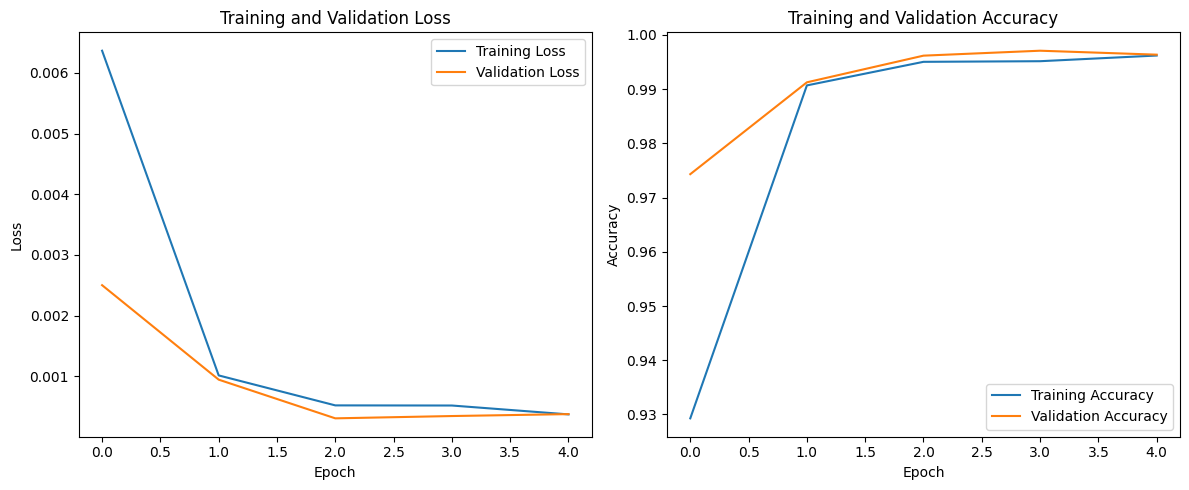

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training and validation losses
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')  # Add validation loss
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Confusion Matrix


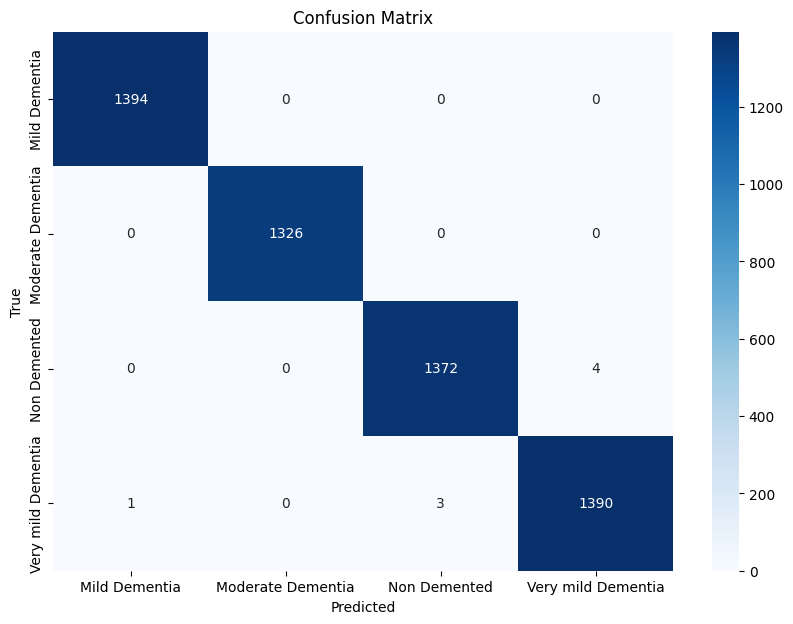

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Confusion Matrix")
class_names = {"Mild Dementia": 0, "Moderate Dementia": 1, "Non Demented": 2, "Very mild Dementia": 3}
# Generate and display the confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9985428051001821
